Caso de estudio: Creación de una línea de tiempo de eventos
===

Fuente: https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/timeline.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

In [2]:
%%writefile /tmp/normas.csv
nombre,fecha
L 142 y 143/94,1994-07-11
R 025/95,1995-07-13
R 043/95,1995-10-23
R 043/96,1996-06-24
R 076/97,1997-04-04
R 070/98,1998-05-28
R 116/98,1998-11-06
L 689/01,2001-08-28
D 3735/03,2003-12-19
D 850/05,2005-03-28
D 2424/06,2006-07-16
L 1151/07,2007-07-24
R 097/08,2008-09-26
R 110/09,2009-10-01
D 2915/11,2011-08-11
D 4955/11,2011-12-30

Overwriting /tmp/normas.csv


In [3]:
data = pd.read_csv("/tmp/normas.csv")
data.head()

,nombre,fecha
0,L 142 y 143/94,1994-07-11
1,R 025/95,1995-07-13
2,R 043/95,1995-10-23
3,R 043/96,1996-06-24
4,R 076/97,1997-04-04


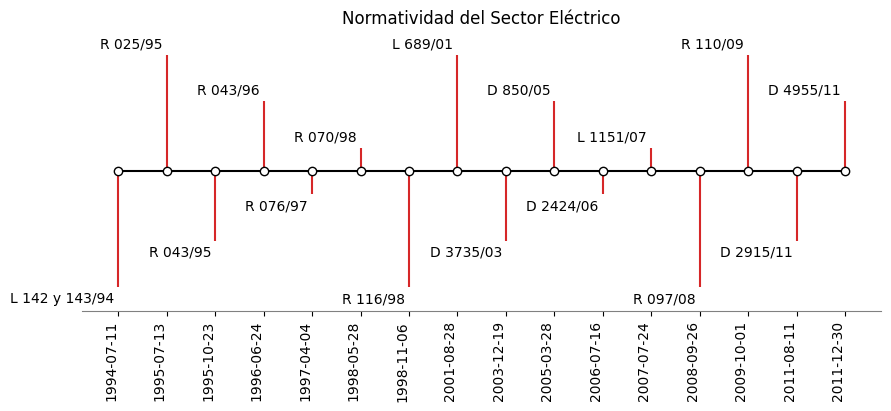

In [4]:
levels = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(data) / 6)))[: len(data)]


fig, ax = plt.subplots(
    figsize=(8.8, 4),
    constrained_layout=True,
)

ax.set(title="Normatividad del Sector Eléctrico")

ax.vlines(
    data.fecha,
    0,
    levels,
    color="tab:red",
)

# 
# Linea base
#
ax.plot(
    data.fecha,
    np.zeros_like(data.fecha),
    "-o",
    color="k",
    markerfacecolor="w",
)

# 
# Version
#
for d, l, r in zip(data.fecha, levels, data.nombre):
    ax.annotate(
        r,
        xy=(d, l),
        xytext=(-3, np.sign(l) * 3),
        textcoords="offset points",
        horizontalalignment="right",
        verticalalignment="bottom" if l > 0 else "top",
    )


plt.setp(ax.get_xticklabels(), rotation=90, ha="right")

ax.yaxis.set_visible(False)

ax.spines["bottom"].set_color("gray")
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.margins(y=0.1)

plt.show()